<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Optimización univariada usando JAX </center></span>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Carga módulos](#Carga-módulos)
* [Genera y grafica datos simulados](#Genera-y-grafica-datos-simulados)
* [Función de pérdida](#Función-de-Pérdida)
* [Gradiente descendiente](#Gradiente-descendiente)
* [Optimización](#Optimización)
* [Visualizando la función pérdida](#Visualizando-función-pérdida)


## <span style="color:blue">Introducción</span> 

En este ejercicio generamos un conjunto de datos que sigue un modelo lineal, pasando por el origen. Lo datos son contaminado con un error normal $N(0,2^2)$.

## <span style="color:blue">Carga módulos</span> 

In [12]:
from __future__ import print_function
import jax.numpy as np # autograd para windows
import numpy as onp
import matplotlib.pyplot as plt
from jax import grad,jit
import pandas as pd

In [12]:
from __future__ import print_function
import jax.numpy as np # autograd para windows
import numpy as onp
import matplotlib.pyplot as plt
from jax import grad,jit
import pandas as pd

## <span style="color:blue">Genera y grafica datos simulados</span> 

In [13]:
# Simulate Data

# Choose a Seed
onp.random.seed(22)

# Generate Data
x=onp.linspace(-2,2,100)
y=5*x+2*onp.random.normal(0,1,len(x))


#Print Results
#print("x:\n",x,"\n")
#print("y:\n",y)

data=pd.DataFrame({"Mediciones":x,"Observaciones":y})
data

,Mediciones,Observaciones
0,-2.000000,-10.183900
1,-1.959596,-12.724681
2,-1.919192,-7.432376
3,-1.878788,-9.872590
4,-1.838384,-10.174177
...,...,...
95,1.838384,10.930610
96,1.878788,8.960411
97,1.919192,9.630197
98,1.959596,11.177407


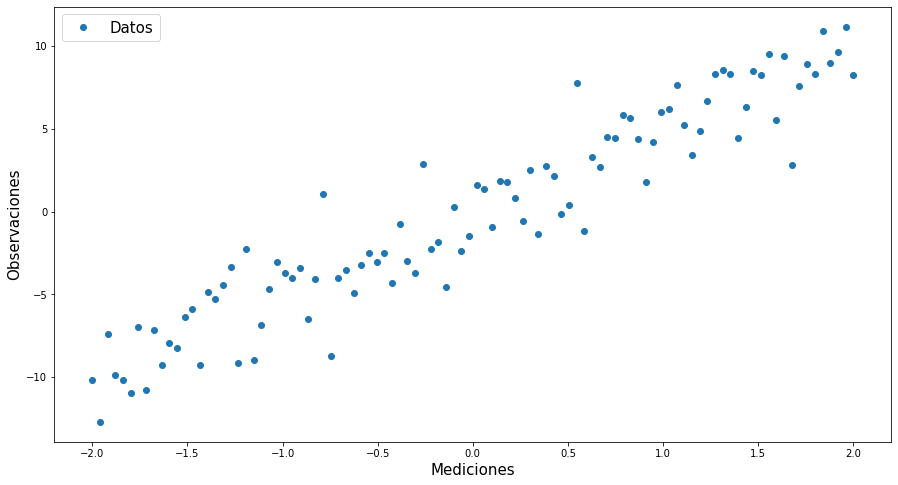

In [14]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos"],fontsize=15)
plt.show()

## <span style="color:blue">Función de pérdida</span>  

In [15]:
def loss(w1,x,y):
    return ((y-(w1*x))**2).mean()

## Diferenciación Automática
grad_loss=jit(grad(loss,argnums=(0)))

## <span style="color:blue">Gradiente descendiente </span>  

In [16]:
def optimize(w1,x,y,h=1.5):
    
    # Calcular Derivada
    w1_grad=grad_loss(w1,x,y)
    
    # Gradiente Descendiente
    w1-=h*w1_grad
    
    # Regresar Nuevos parámetros
    return w1

## <span style="color:blue">Optimización</span>  

In [17]:
## Initial Guess
W1=10.

# Acumular resultados
w1=[]
train_loss=[]
# Número de veces que se cambiar los parámetros
epochs=401

# Tasa de Aprendizaje
h=0.01
#0.8

print("Pérdidas:\n")

w1.append(W1)
train_loss.append(loss(W1,x,y))
print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

for epoch in range(epochs):
    
    W1=optimize(W1,x,y,h)
    
    w1.append(W1)
    
    losss=loss(W1,x,y)
    
    train_loss.append(losss)
    
    if epoch%100==0:
        print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")


Pérdidas:

Condición Inicial: Pérdida: 38.407744806265676, Parámetro: 10.0

Iteración 0: Pérdida: 36.55500411987305, Parámetro: 9.86294937133789
Iteración 100: Pérdida: 4.018570423126221, Parámetro: 5.273087501525879
Iteración 200: Pérdida: 3.88777232170105, Parámetro: 4.982072830200195
Iteración 300: Pérdida: 3.887246608734131, Parámetro: 4.963622093200684
Iteración 400: Pérdida: 3.88724422454834, Parámetro: 4.962451457977295


In [18]:
print(w1[-1])

4.9624515


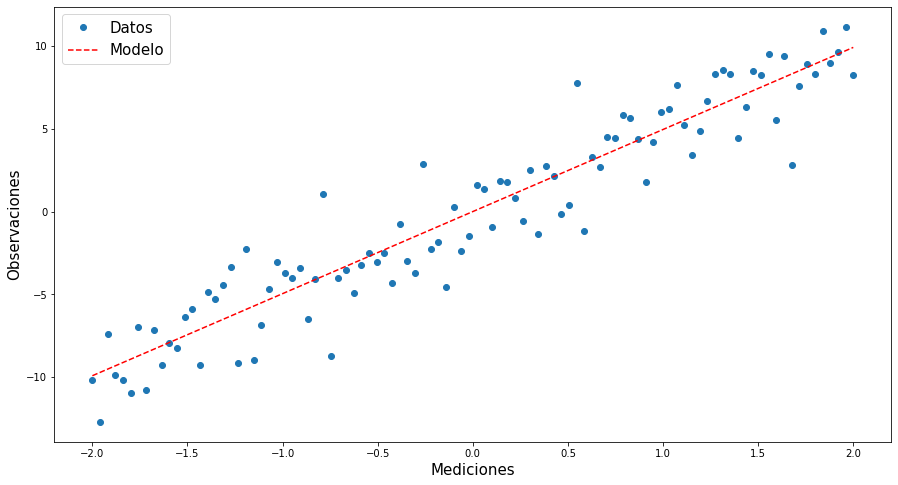

In [19]:
# Make Model

mod=w1[-1]*x

plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.plot(x,mod,'r--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos","Modelo"],fontsize=15)
plt.show()

## <span style="color:blue">Visualizando la función pérdida </span>  

In [9]:
# eje β (par.)
β1x=onp.linspace(-2,11,epochs)

l=onp.empty(len(β1x))

for i in range(len(l)):
    l[i]=((β1x[i]*x-y)**2).mean()

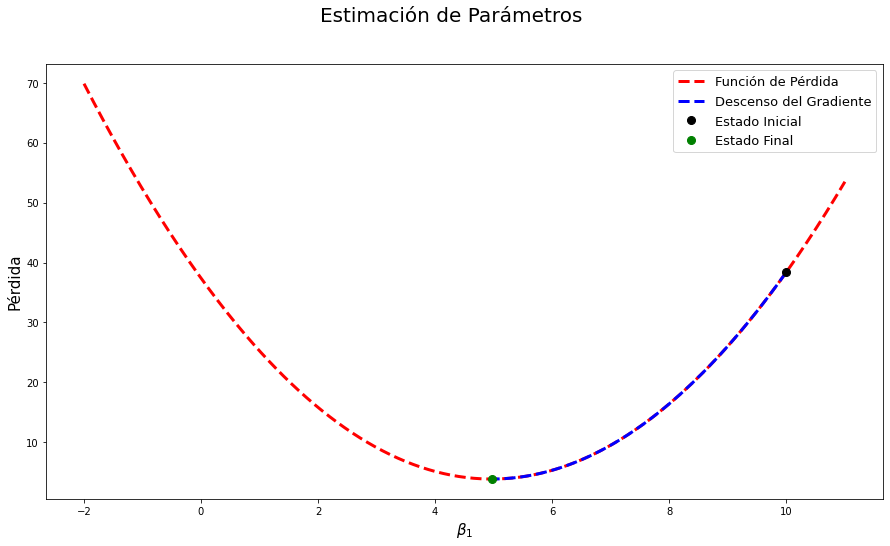

In [10]:
fig = plt.figure(figsize=(15,8))
plt.suptitle("Estimación de Parámetros",fontsize=20)
ax = plt.axes()


ax.plot(β1x,l,'r--',lw=3) # Loss Function

ax.plot(w1,train_loss,'b--',lw=3,ms=8) # Path Taken by Optimizer
ax.plot(w1[0],train_loss[0],'ko',ms=8) # Initial Condition
ax.plot(w1[-1],train_loss[-1],'go',ms=8) # Final State

ax.set_xlabel(r"$\beta_1$",fontsize=15)
ax.set_ylabel(r"Pérdida",fontsize=15)
plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
plt.show()

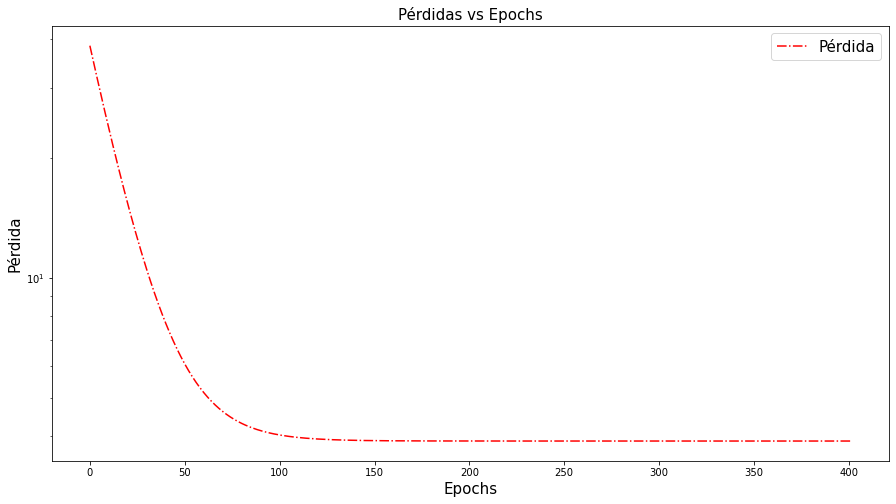

In [11]:
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs+1),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.title("Pérdidas vs Epochs",fontsize=15)
plt.show()